In [22]:
import numpy as np
from scipy.special import softmax
import lime.tools as lime_utils
import matplotlib.pyplot as plt
import itertools

plt.style.use({"figure.facecolor": "white"})

In [2]:
test_set = []
test_set.append(np.array([ 0.00, 0.00, 1.00]))
test_set.append(np.array([-0.20, 0.01, 0.80]))
test_set.append(np.array([ 0.10, 0.10, 0.80]))
test_set.append(np.array([ 0.00, 0.00, 0.00]))

In [3]:
for x in test_set:
    print(f"x={x}")
    print(f"softmax(x)={softmax(x)}")
    print(f"custom_norm(x)={lime_utils.custom_normalize(x)}")
    print()


x=[0. 0. 1.]
softmax(x)=[0.21194156 0.21194156 0.57611688]
custom_norm(x)=[0. 0. 1.]

x=[-0.2   0.01  0.8 ]
softmax(x)=[0.20194025 0.24912925 0.5489305 ]
custom_norm(x)=[0.         0.01234568 0.98765432]

x=[0.1 0.1 0.8]
softmax(x)=[0.2491434 0.2491434 0.5017132]
custom_norm(x)=[0.1 0.1 0.8]

x=[0. 0. 0.]
softmax(x)=[0.33333333 0.33333333 0.33333333]
custom_norm(x)=[0.33333334 0.33333334 0.33333334]



In [4]:
x = np.stack(test_set)
print(x)
print()
print(lime_utils.custom_normalize(x))

[[ 0.    0.    1.  ]
 [-0.2   0.01  0.8 ]
 [ 0.1   0.1   0.8 ]
 [ 0.    0.    0.  ]]

[[0.         0.         1.        ]
 [0.         0.01234568 0.98765432]
 [0.1        0.1        0.8       ]
 [0.33333334 0.33333334 0.33333334]]


### Check custom normalization

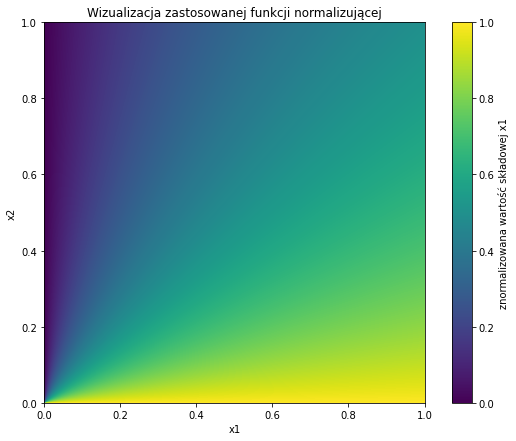

In [17]:
N = 1000 + 1
x1 = np.linspace(0.0, 1.0, N)
x2 = np.linspace(0.0, 1.0, N)
x = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)
y = lime_utils.custom_normalize(x, axis=1)
y1 = y[:,0].reshape(N,-1)
y2 = y[:,1].reshape(N,-1)

fig = plt.figure(figsize=(10,7))
im = plt.imshow(y1.T[::-1,], extent=(0.0, 1.0, 0.0, 1.0))
cbar = plt.colorbar(im)
cbar.ax.set_ylabel(f"znormalizowana wartość składowej x1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title(f"Wizualizacja zastosowanej funkcji normalizującej")
plt.show()
fig.savefig("custom_norm.png", dpi=100)

0.5


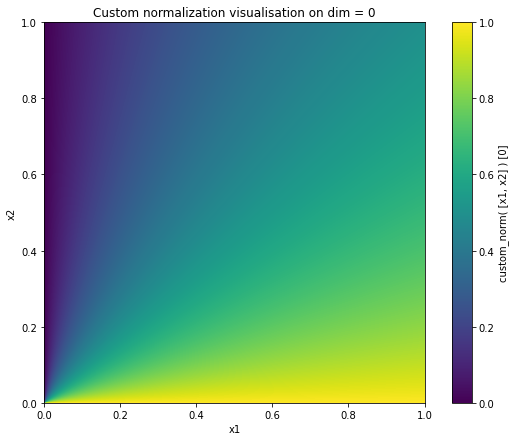

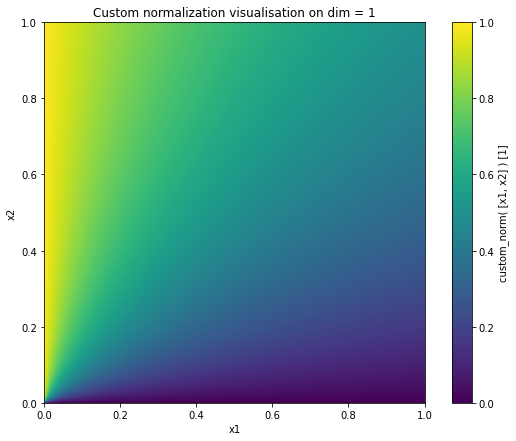

In [108]:
N = 1000 + 1
x1 = np.linspace(0.0, 1.0, N)
x2 = np.linspace(0.0, 1.0, N)
x = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)
y = lime_utils.custom_normalize(x, axis=1)
y1 = y[:,0].reshape(N,-1)
y2 = y[:,1].reshape(N,-1)

print(y1[0,0])
for i, dim in enumerate([y1, y2]):
    plt.figure(figsize=(10,7))
    im = plt.imshow(dim.T[::-1,], extent=(0.0, 1.0, 0.0, 1.0))
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel(f"custom_norm( [x1, x2] ) [{i}]")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f"Custom normalization visualisation on dim = {i}")
    plt.show()
assert np.allclose(y1 + y2, 1.0)

### Check softmax normalization

0.5


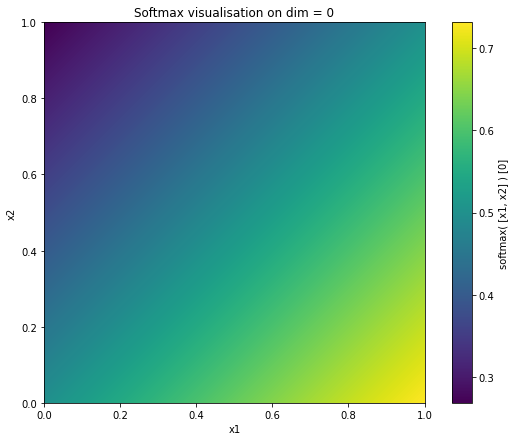

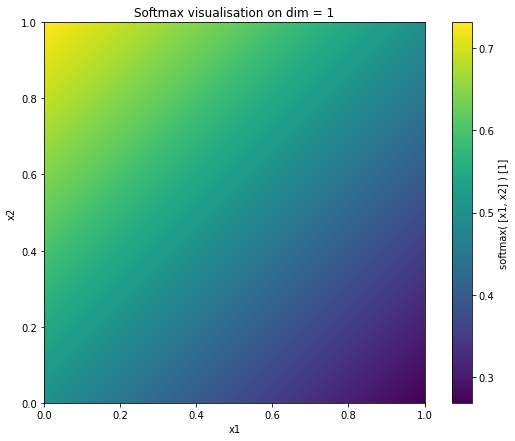

In [109]:
N = 1000 + 1
x1 = np.linspace(0.0, 1.0, N)
x2 = np.linspace(0.0, 1.0, N)
x = np.array(np.meshgrid(x1, x2)).T.reshape(-1, 2)
y = softmax(x, axis=1)
y1 = y[:,0].reshape(N,-1)
y2 = y[:,1].reshape(N,-1)

print(y1[0,0])
for i, dim in enumerate([y1, y2]):
    plt.figure(figsize=(10,7))
    im = plt.imshow(dim.T[::-1,], extent=(0.0, 1.0, 0.0, 1.0))
    cbar = plt.colorbar(im)
    cbar.ax.set_ylabel(f"softmax( [x1, x2] ) [{i}]")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(f"Softmax visualisation on dim = {i}")
    plt.show()
assert np.allclose(y1 + y2, 1.0)